Context  
The dataset are related to red variants of the Portuguese "Vinho Verde" wine. 

This dataset consist of 11 input variables based on physicochmical analysis of red wines and 1 output variable.

Input variables:  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates 
11 - alcohol  


Output variable (based on sensory data):
12 - quality

For more information, read https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 and  a publication by [Cortez et al.,2009].

In this file, I'm going to explore the data and built on analysis based on the exploration.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

In [3]:
# dataset shape and content

df=pd.read_csv('winequality.csv')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# check missing data
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing data

In [5]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The data types are mostly float, with the exception of quality.

In [6]:
# data descriptions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


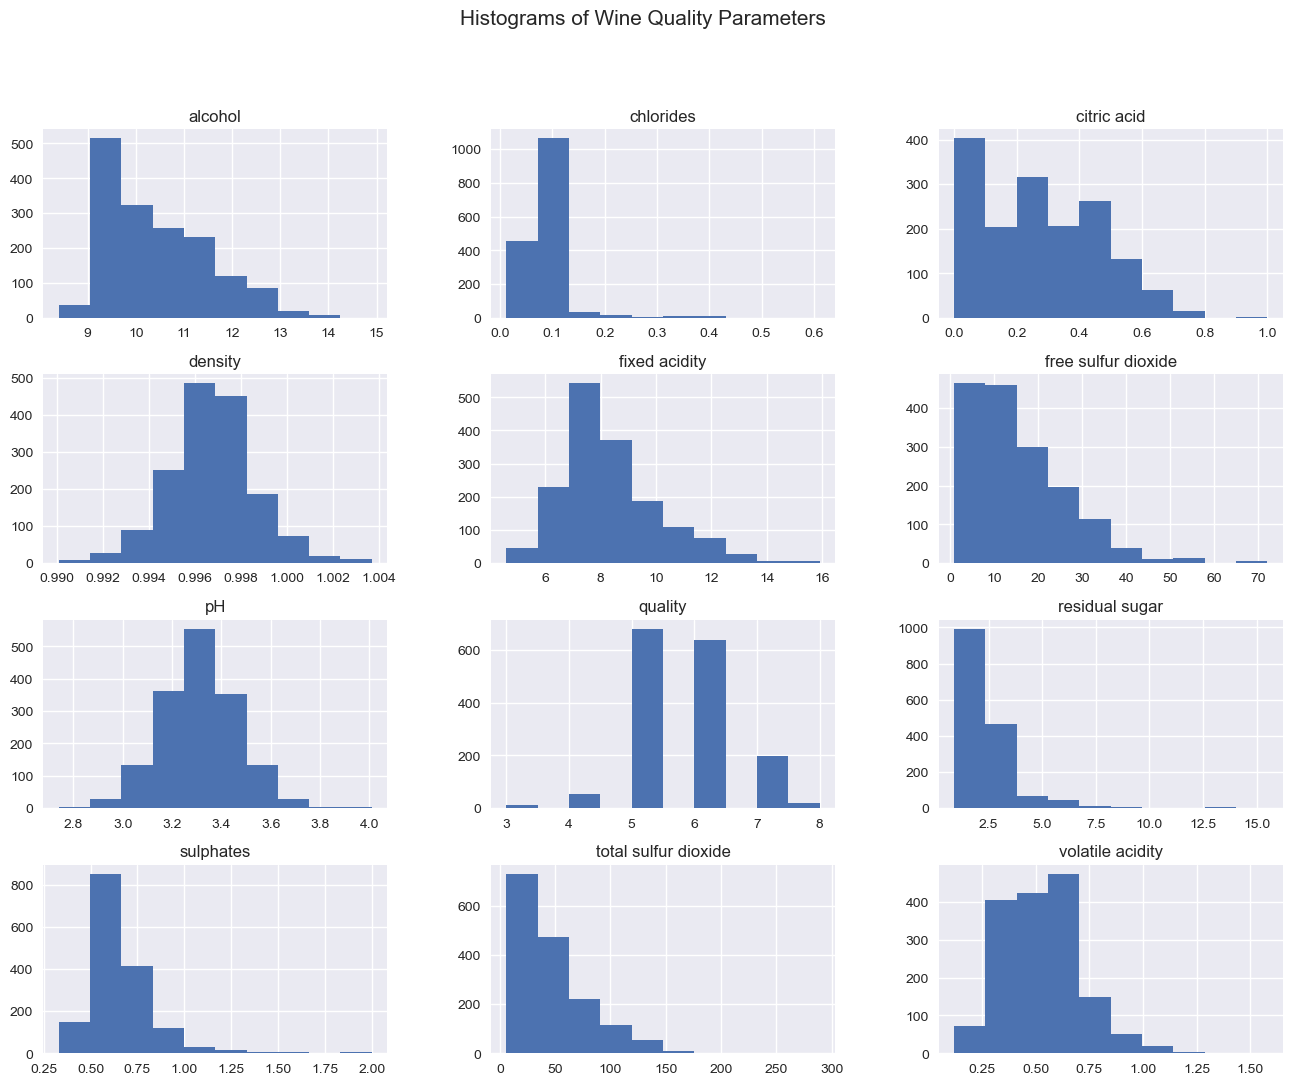

In [80]:
# Data distribution
plt.style.use('seaborn')
df.hist(figsize=(16,12))
plt.suptitle('Histograms of Wine Quality Parameters', size=15)

plt.savefig('histogram.png')
plt.show()

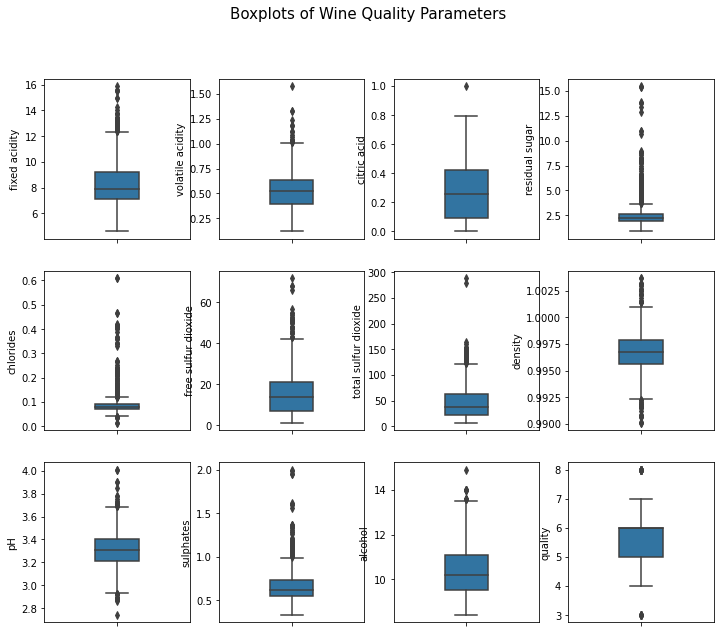

In [4]:
# boxplot
kolom=df.columns
plt.figure(figsize=(12,10))
plt.suptitle('Boxplots of Wine Quality Parameters', size=15)
for i in range(len(kolom)):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[kolom[i]],orient='v', width=0.3)
    plt.grid(False)
plt.savefig('boxplot.png')

A quick look at the histogram and boxplot, indicated that the data distributions is not normal, with quite some outliers, especially on the upper/higher values. 

For parameters like chloride, volatile acidity and sulfuric compounds ( total and free sulfur dioxide and sulphate), right skewed data (the data mostly concentrated on the left side/ lower values) make sense, since too much of these compounds are unfavorable ( chloride cause saltiness, sulfuric compund and volatile acidity cause strange smell).

Alcohol and residual sugar is also right skewed. These pamareters values are highly depending on initial sugar content of the grapes used to make the wines and the yeast used in fermentation. The initial sugar in the grape juice is fermented into alcohol, until the sugar depleted or the yeast died due to high concentration of alcohol. The data shows that in most winemaking, the fermentation happened until the sugar is almost depleted, resulting in alcohol content arounf 10-11%.

The density and pH distibution is concentrated in the middle. The mean of the density is 0.997, and the spread out of the data is quite close to this number, which is close to the density of water. While the mean of the pH is 3.3, with the pH ranging from 2.8-4, all indicate acidity.

In [6]:
def pencilan (x):
    IQR=x.describe()['75%']-x.describe()['25%']
    batasAtas=x.describe()['75%']+(1.5*IQR)
    batasBawah=x.describe()['25%']-(1.5*IQR)
    pencilan=[i for i in x if i>batasAtas or i<batasBawah]
    return pencilan

In [7]:
# Checking the number of outliers 
outliers=[]

for i in kolom:
    outliers.append([i,len(pencilan(df[i]))])
pd.DataFrame(outliers, columns=['Column Names', 'Number of Outliers'])

,Column Names,Number of Outliers
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


There's quite some outliers in the data. Since I want to use regression for the prediction, I will try to handle these outliers.

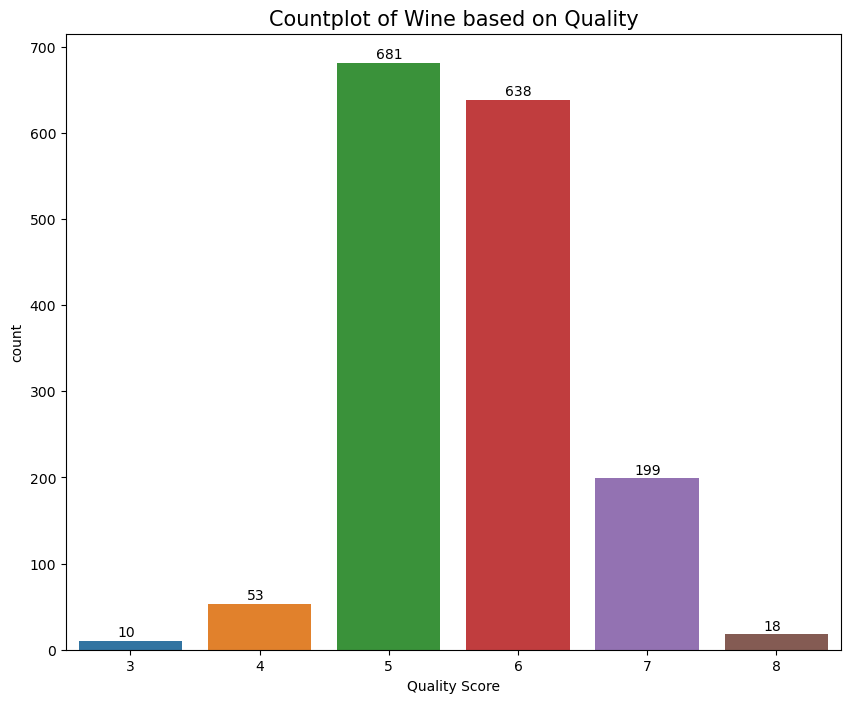

In [84]:
# Countplot of wine quality

plt.style.use('default')
plt.figure(figsize=(10,8))
ax = sns.countplot(x="quality", data=df, order=[3,4,5,6,7,8])
plt.title('Countplot of Wine based on Quality', fontdict={'fontsize':15})
plt.xlabel('Quality Score')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

plt.savefig('countplot.png')

The countplot shows that the quality of the wine in the dataset is not balanced, most of the wine quality ratings are mediocore (5-6), and there is no very poor (0-2) and very good (9,10) rated wine. This might be because most of the wine on the market **is** mediocore. Very poor wine wouldn't sell, and might be hazardous, while very high quality wine is most likely very expensive and has a very niche market.

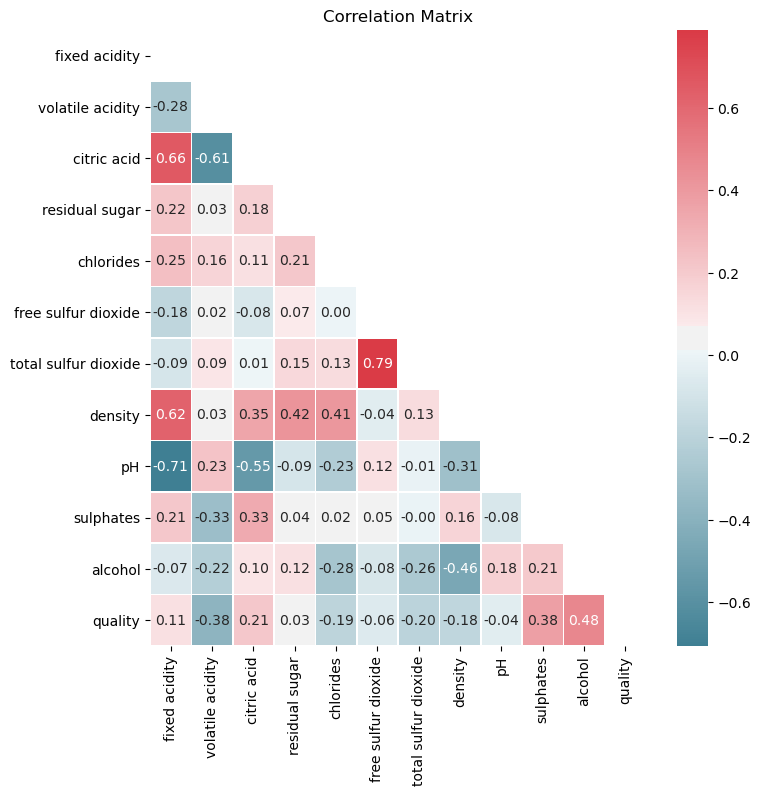

In [85]:

corr = df.corr('spearman') # since the distributions is not normal, use spearmen
fig, ax = plt.subplots(figsize = (8,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title("Correlation Matrix")
plt.savefig('corrmatrix.png')
plt.show()

The correlation matrix and regression plots show that the parameters that is most correlated with the wine quality is alcohol content, they have a positive correlation (the higher the alcohol content, the higher the quality) though the correlation is relatively weak (0.48).

Wine quality also weakly correlated with volatile acidity (-0.38) and sulphates (0.38). Volatile acidity can cause vinegar like smell in wine and therefore has a negative correlation with wine quality, while sulphates is an important antimicrobial and antioxidant agent, hence the positive relationship with wine quality.

It is interesting to note that all of the above parameters also correlated with other parameters. As example, alcohol, correlated with density, which correlated with fixed acidity, which correlated with pH, etc. From prediction point of view, this shows multicolinearity potential, which can affect the result of linear regression models. From business point of view, this means that the parameters to decide wine quality are related to each other, therefore, a comprehensive analysis is important to keep the quality of wine.

Lastly, the lack of strong correlation of the parameters with wine quality indicate that wine rating, which is done through sensory test, can be quite subjective. Having your wine highly rated, doesn't guarantee everyone will love it.

In [ ]:
df['alcohol']=[round(i,2) for i in df['alcohol']]

In [30]:
df_mean=df.groupby('quality', as_index=False).mean()
df_mean

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
5,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


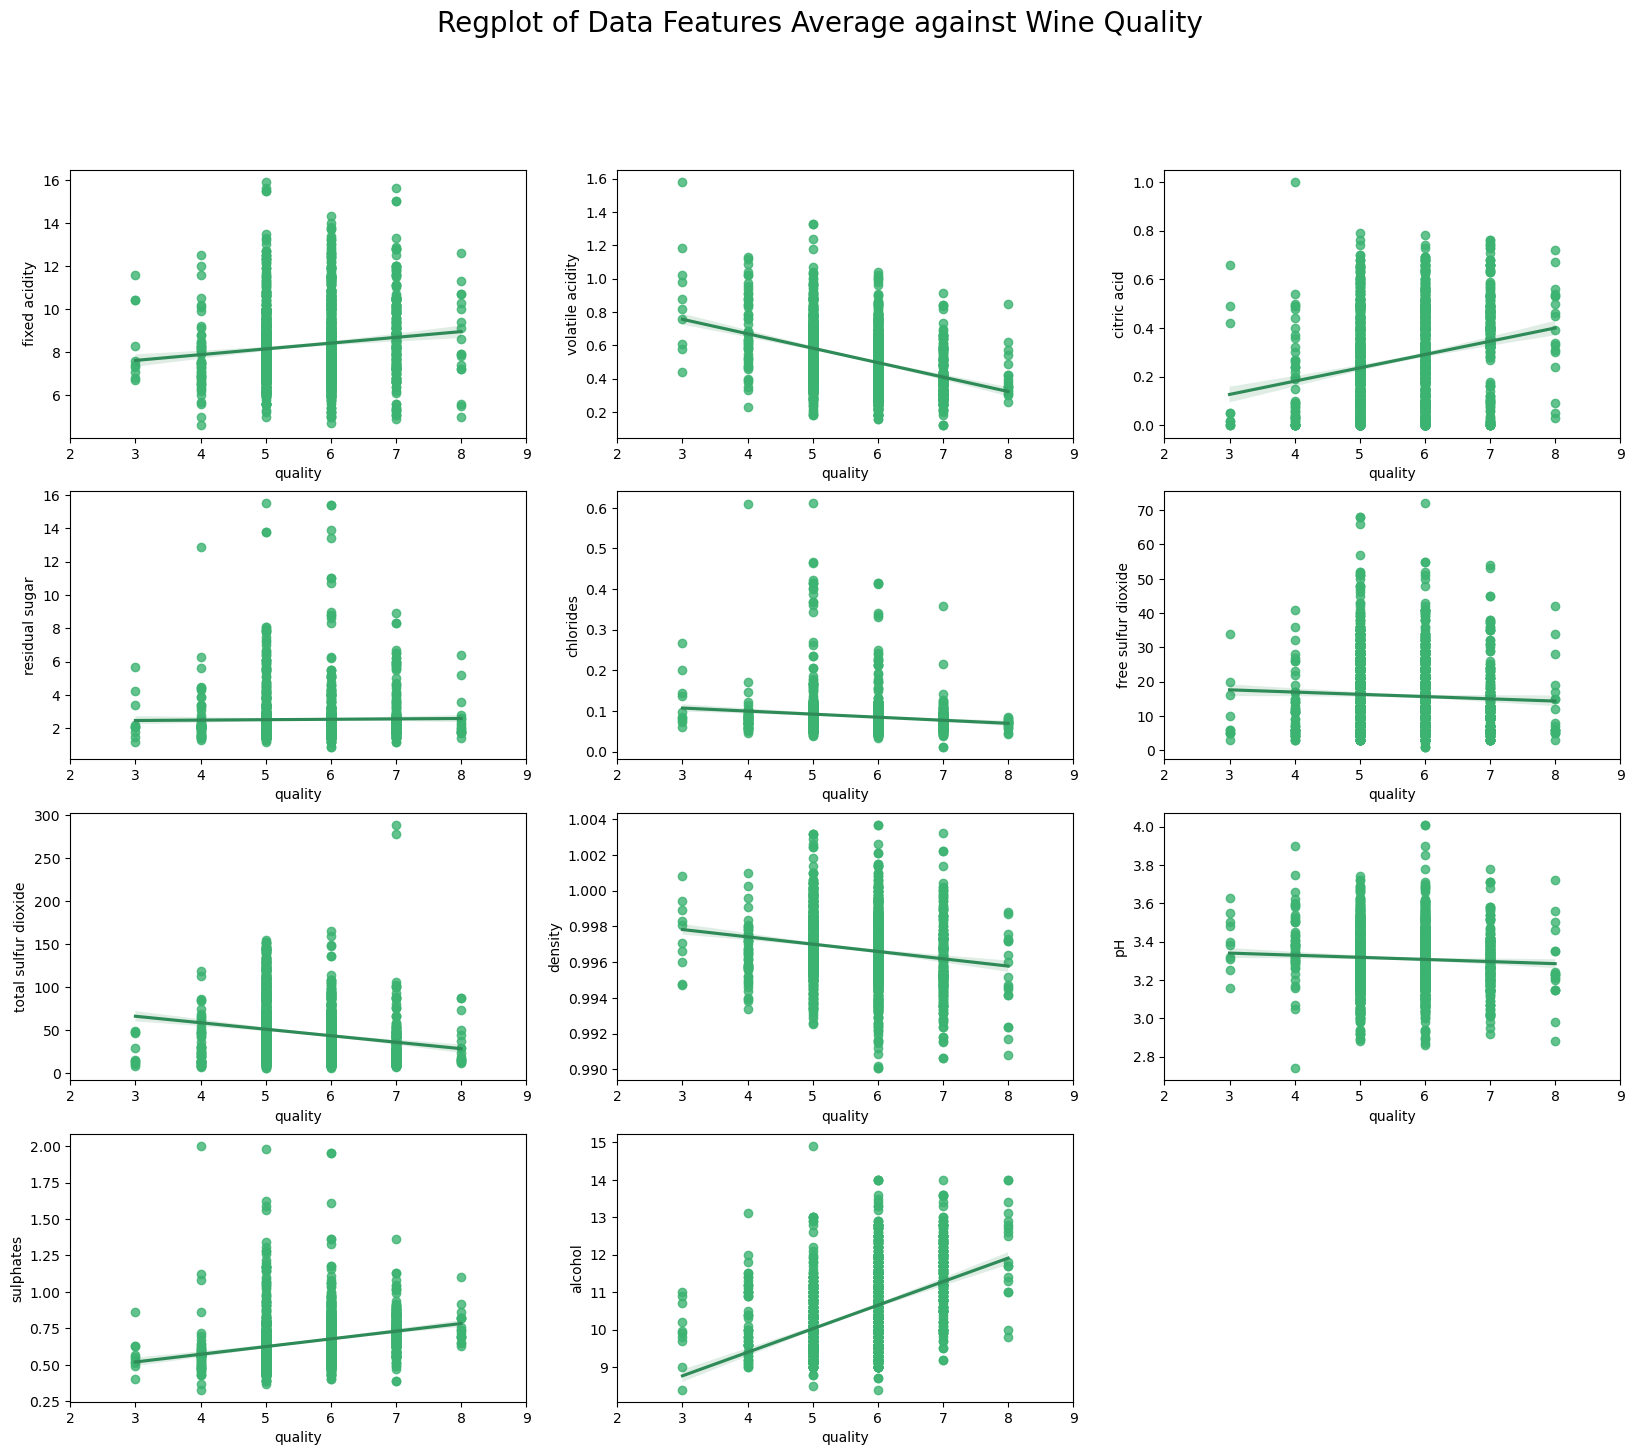

In [86]:
kolom=list(df.columns)
kolom.pop()
index=1
plt.figure(figsize=(20,16))
for i in kolom:
    plt.subplot(4,3,index)
    sns.regplot(x="quality", y=f"{i}", data=df, scatter_kws={"color": "mediumseagreen"}, line_kws={"color": "seagreen"})
    plt.xlim(2,9)
    index+=1
plt.suptitle("Regplot of Data Features Average against Wine Quality", size=20)
plt.savefig('regplot.png')
plt.show()

Sources:

https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013).

https://en.wikipedia.org/wiki/Winemaking

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

